# Project Part 3
 
## DOMAIN: 
Startup ecosystem

## CONTEXT: 
Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience, present in person and online.

## DATA DESCRIPTION
CompanyX_EU.csv - Each row in the dataset is a Start-up company and the columns describe the company.

### ATTRIBUTE INFORMATION:
1. Startup: Name of the company 
2. Product: Actual product
3. Funding: Funds raised by the company in USD
4. Event: The event the company participated in 
5. Result: Described by Contestant, Finalist, Audience choice, Winner or Runner up
6. OperatingState: Current status of the company, Operating ,Closed, Acquired or IPO
*Dataset has been downloaded from the internet. All the credit for the dataset goes to the original creator of the data.

 ## Tasks
 
### 1. Data warehouse:
• Read the CSV file.

### 2. Data exploration:
• Check the datatypes of each attribute.
• Check for null values in the attributes.

### 3. Data preprocessing & visualisation:
• Drop the null values.
• Convert the ‘Funding’ features to a numerical value.
• Plot box plot for funds in million.
• Get the lower fence from the box plot.
• Check number of outliers greater than upper fence.
• Drop the values that are greater than upper fence.
• Plot the box plot after dropping the values.
• Check frequency of the OperatingState features classes.
• Plot a distribution plot for Funds in million.
• Plot distribution plots for companies still operating and companies that closed.

### 4. Statistical analysis:
• Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? 
Write the null hypothesis and alternative hypothesis.
Test for significance and conclusion
• Make a copy of the original data frame.
• Check frequency distribution of Result variable.
• Calculate percentage of winners that are still operating and percentage of contestants that are still operating
• Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:
 Write the null hypothesis and alternative hypothesis.
 Test for significance and conclusion
• Check distribution of the Event variable.
• Select only the Event that has disrupt keyword from 2013 onwards.
• Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 
2013 onwards.
• Plot the distribution plot comparing the 3 city events.

### 5. Improvements
Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform 
a better data analysis.

# Task 1

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

data = pd.read_csv('company.csv')
data.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


# Task 2

In [56]:
print(data.dtypes)
# Many have datatype as object


Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object


Notes: 
- All the columns are of 'object' data type, hence soon a new column will be added with float type Funding data

# Task 3

In [59]:
data.isna().sum()

datanew = data.dropna().copy(deep = True) # deep = true for preventing shallow copy
print(datanew.isna().sum().sum()) # operation successful

million_converter = lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1]))
#K to M, function multiplies 1000 and while converting B to M it divides by 1000. M remains as it is

datanew['FundingMillion'] = datanew['Funding'].apply(million_converter)

datanew.rename(columns={'Operating State': 'OperatingState'}) #Renamed this since whitespaces create problems later

datanew.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1 to 661
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Startup         446 non-null    object 
 1   Product         446 non-null    object 
 2   Funding         446 non-null    object 
 3   Event           446 non-null    object 
 4   Result          446 non-null    object 
 5   OperatingState  446 non-null    object 
 6   FundingMillion  446 non-null    float64
dtypes: float64(1), object(6)
memory usage: 27.9+ KB


Notes:
 - data was read and data types of each was checked
 - total null values was found and new dataframe containig non null values from the initial data was replicated deeply
 - FundingMillion column was created to contain the 'Funding' data numerically also maintaining homogenity of units. 
 - Renamed Operating State to OperatingState

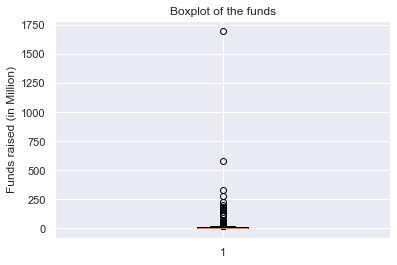

In [28]:
plot = plt.boxplot(datanew.FundingMillion)
plt.title('Boxplot of the funds')
plt.ylabel("Funds raised (in Million)")

plt.show()

- The box plot of Funds in Million shows that there are significatnt outliers


Number of outliers above =  60
Number of outliers below =  0


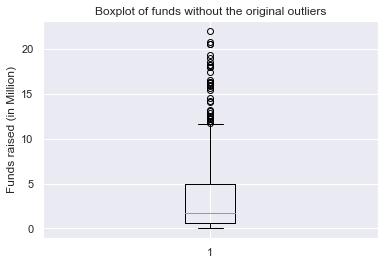

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

In [58]:
lower_fence = datanew['FundingMillion'].quantile(q=0.25) - (datanew['FundingMillion'].quantile(q=0.75) - datanew['FundingMillion'].quantile(q=0.25))*1.5
top_fence = datanew['FundingMillion'].quantile(q=0.75) + (datanew['FundingMillion'].quantile(q=0.75) - datanew['FundingMillion'].quantile(q=0.25))*1.5

print('Number of outliers above = ', len(datanew[datanew.FundingMillion > top_fence]))
print('Number of outliers below = ', len(datanew[datanew.FundingMillion < lower_fence]))


datanew1 = datanew.drop(datanew[datanew.FundingMillion > upper_fence].index)


plot = plt.boxplot(datanew1.FundingMillion)
plt.title('Boxplot of funds without the original outliers')
plt.ylabel("Funds raised (in Million)")
plt.show()


datanew1.OperatingState.value_counts()

 - 275 companies out of the companies in the data are operating (after eliminating outliers)
 

C:\Users\Harsh Pundhir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


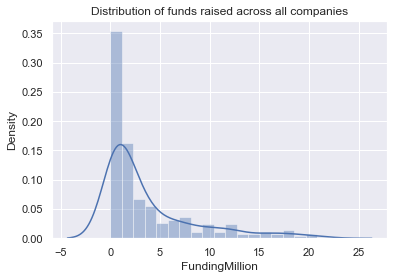

count    386.00000
mean       3.72514
std        4.73236
min        0.00500
25%        0.60000
50%        1.70000
75%        5.00000
max       22.00000
Name: FundingMillion, dtype: float64

In [41]:
sns.distplot(datanew1.FundingMillion)
plt.title('Distribution of funds raised across all companies')
plt.show()

datanew1.FundingMillion.describe()

- The distribution for Funding in Million is right tailed as shown by the plot (also as mean >> median)

C:\Users\Harsh Pundhir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harsh Pundhir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


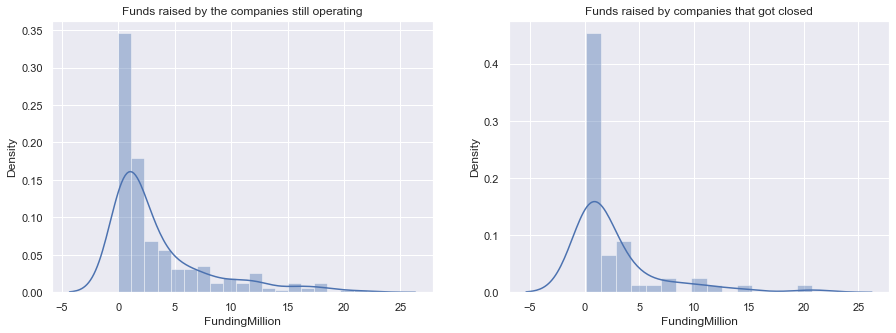

In [44]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(datanew1.loc[datanew1.OperatingState == 'Operating', 'FundingMillion'], ax = ax[0])
sns.distplot(datanew1.loc[datanew1.OperatingState =='Closed', 'FundingMillion'], ax = ax[1])

ax[0].set_title('Funds raised by the companies still operating')
ax[1].set_title('Funds raised by companies that got closed')
plt.show()

- The distributions seem familiar
- To evaluate significant difference we will do a hypothesis test
- Either 2 sample t test or z-test can be used as mean is our only concern here
- We can perform the tests above as sample size is > 30 (however, it does not look normal!!!)

For test 1, 

**Null hypothesis (Ho)**  =  There is no difference between the two means

**Alternate hypothesis (Ha)** =  There is significant difference between the two means

In [60]:
from statsmodels.stats.weightstats import ztest

sample1 = datanew1.loc[datanew1.OperatingState == 'Operating', 'FundingMillion']
sample2 = datanew1.loc[datanew1.OperatingState =='Closed', 'FundingMillion']

alpha = 0.05   # significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

if p_value <= alpha:
    print('Since the p-value', round(p_value, 3),' < ', alpha ,' the difference is significant and we reject the Null hypothesis')
else:
    print('Since the p-value', round(p_value,3),' > ',alpha,' the difference is not significant and, we fail to reject the Null hypothesis')
    

Since the p-value 0.192  >  0.05  the difference is not significant and, we fail to reject the Null hypothesis


In [61]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

if p_value <= alpha:
    print('Since the p-value', round(p_value, 3),' < ', alpha ,' the difference is significant and we reject the Null hypothesis')
else:
    print('Since the p-value', round(p_value,3),' > ',alpha,' the difference is not significant and, we fail to reject the Null hypothesis')
    

Since the p-value 0.193  >  0.05  the difference is not significant and, we fail to reject the Null hypothesis


- Observing the results of tests performed right above there is no solid ground (evidence) by which I can say that companies raising more money are succesful or vice-versa.

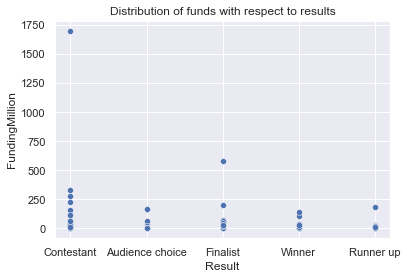

In [74]:
datanew2 = datanew.copy(deep = True)

sns.scatterplot(data = datanew2, y = 'FundingMillion', x = 'Result')
plt.title('Distribution of funds with respect to results')
plt.show()



In [77]:
datanew2 = data.copy(deep = True)


winners = datanew2.Result.value_counts()[1:].sum()
print(winners)

contestants = datanew2.Result.value_counts()['Contestant']
print(contestants)


contestants_operating = datanew2.OperatingState[datanew2.Result == 'Contestant'].value_counts().loc['Operating']

winners_operating = datanew2.OperatingState[datanew2.Result != 'Contestant'].value_counts().loc['Operating']
winners_operating

print("Winners percentage still operating :",round((winners_operating/winners)*100,3),"%")
print("Contestansts percentage still operating :",round((contestants_operating/contestants)*100,3),"%")


174
488
Winners percentage still operating : 76.437 %
Contestansts percentage still operating : 68.033 %


- Some difference between the proportion operational companies in the two categories was observed
- to check if the difference is significant
    - Z-test for proportions
    - Chi-square test
- z-test of proportions was performed 

**Null hyputhesis (Ho)**: The proportion of companies operating is the same in winners and contestants

**Alternative hypothesis (Ha)**: The proportion of companies is significantly different among winners and contestants

In [63]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([contestants_operating, winners_operating], [contestants, winners])

 # fixed the confidence level as 95% already
    
if p_value <= alpha:
    print('Since the p-value', round(p_value, 3),' < ', alpha ,' the difference is significant and we reject the Null hypothesis')
else:
    print('Since the p-value', round(p_value,3),' > ',alpha,' the difference is not significant and, we fail to reject the Null hypothesis')
    

Since the p-value 0.037  <  0.05  the difference is significant and we reject the Null hypothesis


### Notes

- The funds raised by a company is not a significant factor in deciding whether the company will remain operational or not
- competition winners have proven to remain operational more so, than the companies that came out only as contestants

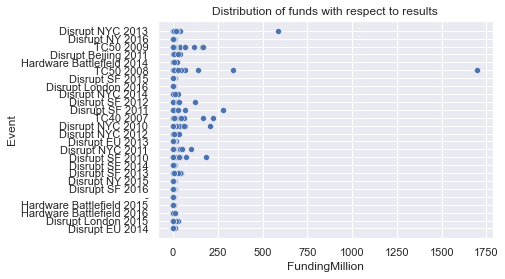

count           446
unique           26
top       TC50 2008
freq             31
Name: Event, dtype: object

In [92]:
sns.scatterplot(data = datanew, y = 'Event', x = 'FundingMillion')
plt.title('Distribution of funds with respect to results')
plt.show()
datanew['Event'].describe()


In [99]:
datanew3 = datanew[datanew.Event.apply(lambda x: 'Disrupt' in x)].Event.value_counts()
datanew3

events = datanew[datanew.Event.apply(lambda x: 'Disrupt' in x and int(x[-4:]) > 2012)].Event  # all the events of relevance
events

NY_events = datanew.loc[events[events.apply(lambda x: 'NY' in x)].index, 'FundingMillion']
SF_events = datanew.loc[events[events.apply(lambda x: 'SF' in x)].index, 'FundingMillion']
EU_events = datanew.loc[events[events.apply(lambda x: 'EU' in x or 'London' in x)].index, 'FundingMillion']
print(len(NY_events), len(SF_events), len(EU_events))

75 77 41


- Each of the three above variables hold the amount of funds with respect to the Cities where the even was organised
- The sample sizes are different across the three categories  ANOVA will be performed


**Null Hypothesis(Ho)**: Average funds raised by companies across three cities are the same 

**Alternative Hypothesis(Ha)**: Average funds raised by companies across three cities are the different

C:\Users\Harsh Pundhir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harsh Pundhir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harsh Pundhir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

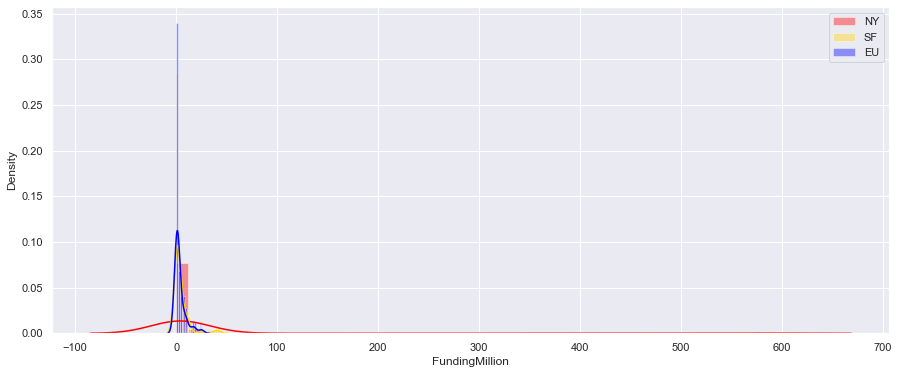

In [100]:
plt.figure(figsize=(15,6))
sns.distplot(NY_events, color = 'Red', label = 'NY')
sns.distplot(SF_events, color = 'Gold', label = 'SF')
sns.distplot(EU_events, color = 'blue', label = 'EU')
plt.legend()
plt.show()

In [102]:
from scipy.stats import f_oneway


stat, p_value = f_oneway(NY_events, SF_events, EU_events)

if p_value <= alpha:
    print('Since the p-value', round(p_value, 3),' < ', alpha ,' the difference is significant and we reject the Null hypothesis')
else:
    print('Since the p-value', round(p_value,3),' > ',alpha,' the difference is not significant and, we fail to reject the Null hypothesis')

Since the p-value 0.4  >  0.05  the difference is not significant and, we fail to reject the Null hypothesis


#### Notes
- The distribution of funds raised by the companies across the three regions is the same
- We found no evidence to say companies participating in certain regions have funds moving towards higher side or vice versa

 ### Extra Notes
 
 1. Data can include details of the founder, for instance a categorical feature pertaining to their education level and hypothesis can be framed and tested to see if has any effect on company status and funding
 
 2. Founders age and experience might give more insights if the data is obtained per se.
 
 3. Company locations can be incurred to see how significant it is
 
 4. Data can be collected from various sources to ensure its veracity
 
 5. If this data is used for IPO investing, automatic data can flow in on the day to day measures with all the operations taking place, this will aid the investor in choosing the company to invest.
 
 ### Thank you!!
 
 
 #  ______________________________END_______________________________